## YouTube streamer Analysis


In [2]:
import pandas as pd 

In [3]:
youtubers_df = pd.read_csv('youtubers_df.csv')


In [4]:
print(youtubers_df.head())

   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk

In [5]:
print(youtubers_df.describe())


              Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


In [6]:
print(youtubers_df.isnull().sum())


Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


It appears that the "Categories" column has 306 missing values, while the other columns do not have any missing values. Now that we have identified the missing values, we can proceed with handling them as discussed earlier.

In [7]:
# Replace missing values in the "Categories" column with the most frequent category
most_frequent_category = youtubers_df['Categories'].mode()[0]
youtubers_df['Categories'].fillna(most_frequent_category, inplace=True)


In [8]:
print(youtubers_df.isnull().sum())


Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64


Data Exploration

In [ ]:
Distributions of Numerical Features:
We can visualize the distributions of numerical features using histograms.

In [10]:
print(youtubers_df.columns)


Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')


In [34]:
df.to_csv('youtubers_df.csv', index=False) 


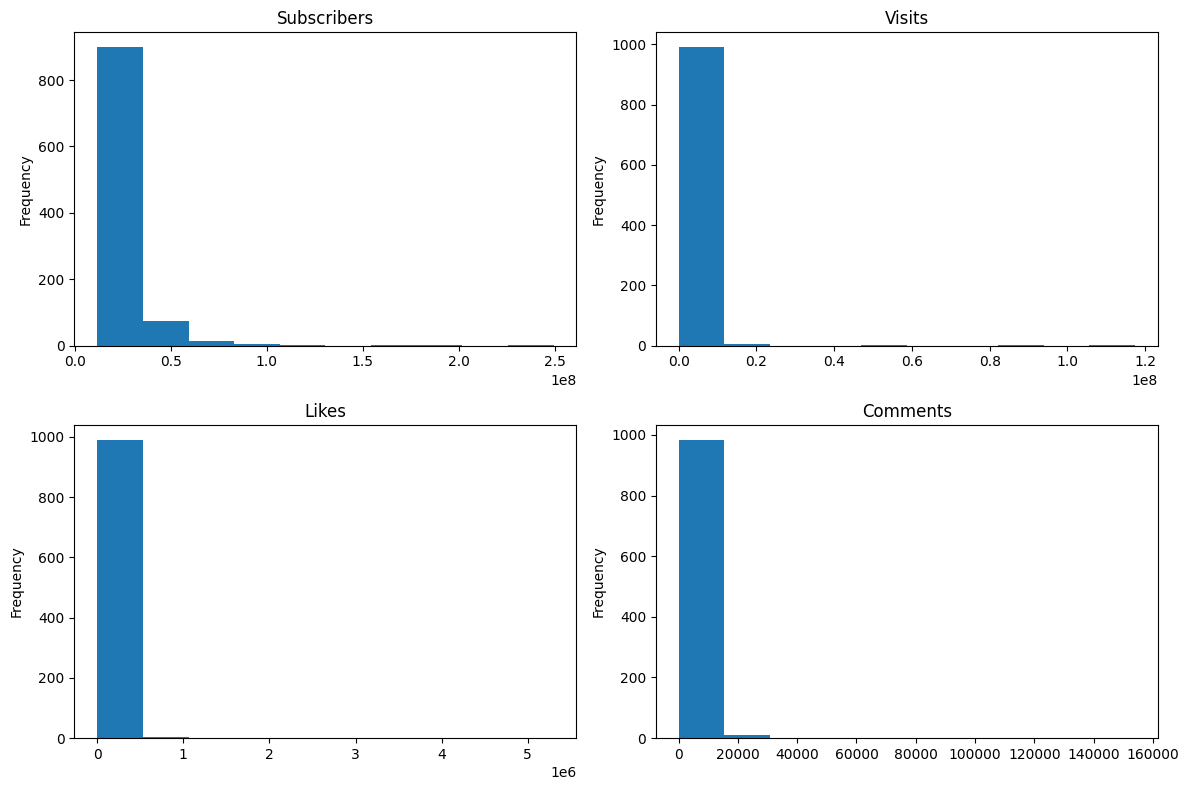

In [11]:
import matplotlib.pyplot as plt

# Set up subplots for the histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms for Subscribers, Visits, Likes, and Comments
youtubers_df['Suscribers'].plot(kind='hist', ax=axes[0, 0], title='Subscribers')
youtubers_df['Visits'].plot(kind='hist', ax=axes[0, 1], title='Visits')
youtubers_df['Likes'].plot(kind='hist', ax=axes[1, 0], title='Likes')
youtubers_df['Comments'].plot(kind='hist', ax=axes[1, 1], title='Comments')

plt.tight_layout()
plt.show()


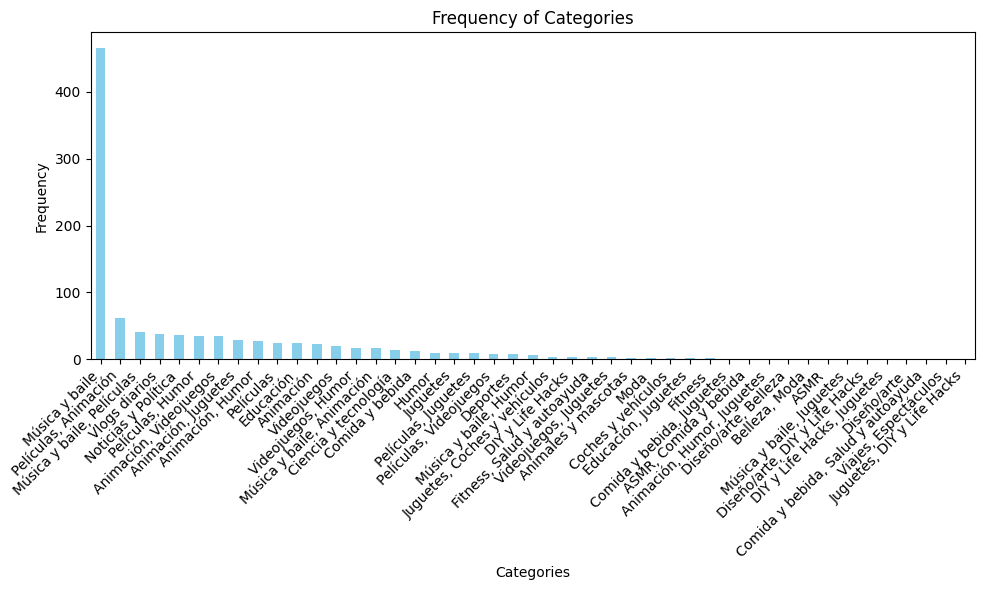

In [12]:
category_counts = youtubers_df['Categories'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


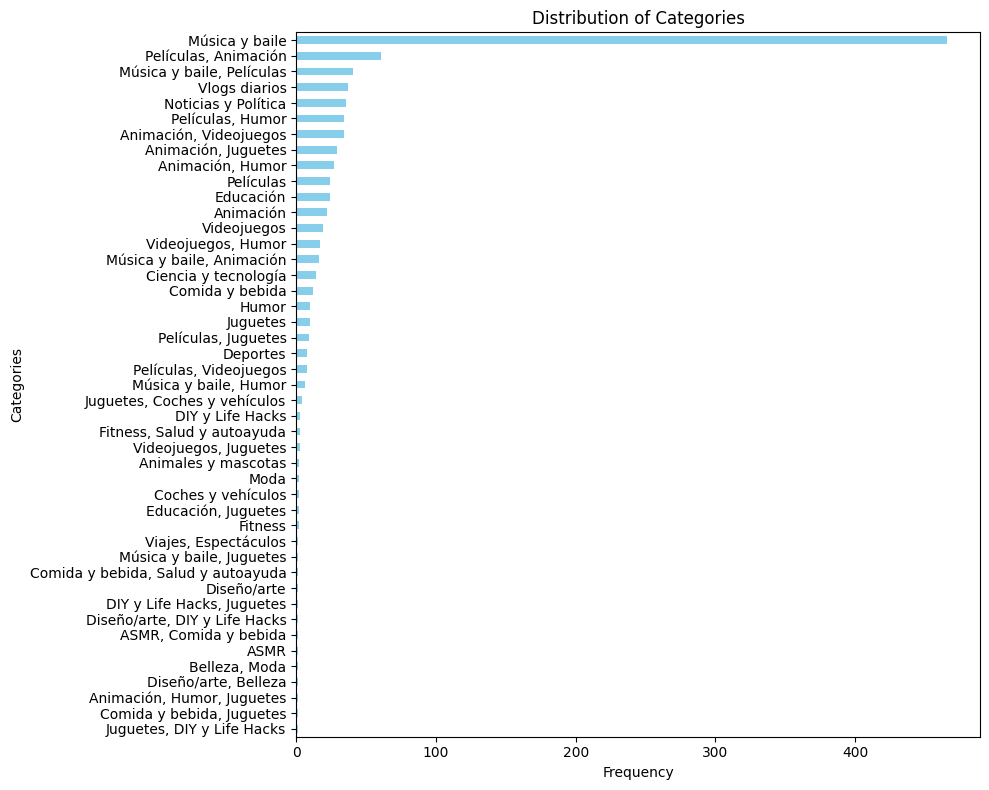

In [13]:

category_counts = youtubers_df['Categories'].value_counts()

# Sort categories by frequency
category_counts = category_counts.sort_values(ascending=True)

# Plot horizontal bar plot for category counts
plt.figure(figsize=(10, 8))
category_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Frequency')
plt.ylabel('Categories')
plt.tight_layout()
plt.show()


In [15]:
from scipy.stats import pearsonr, ttest_ind

# Calculate Pearson correlation coefficient and p-value between 'Likes' and 'Comments'
likes_comments_corr, likes_comments_pvalue = pearsonr(youtubers_df['Likes'], youtubers_df['Comments'])
print(f"Pearson correlation coefficient between Likes and Comments: {likes_comments_corr}")
print(f"P-value: {likes_comments_pvalue}")

# Perform independent samples t-test between 'Suscribers' in India and USA
subscribers_india = youtubers_df[youtubers_df['Country'] == 'India']['Suscribers']
subscribers_usa = youtubers_df[youtubers_df['Country'] == 'Estados Unidos']['Suscribers']

t_statistic, p_value = ttest_ind(subscribers_india, subscribers_usa, equal_var=False)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Pearson correlation coefficient between Likes and Comments: 0.32591142487700087
P-value: 3.548900885538841e-26
T-statistic: 1.6230702053375903
P-value: 0.10533261881204696


Pearson Correlation Coefficient between Likes and Comments:

The Pearson correlation coefficient between the 'Likes' and 'Comments' columns is approximately 0.326.
The p-value associated with the correlation coefficient is very small (approximately 3.55e-26), indicating that the correlation is statistically significant.
Independent Samples t-test between Subscribers in India and USA:

The t-statistic for the t-test comparing the number of subscribers ('Suscribers') in India and the USA is approximately 1.623.
The p-value associated with the t-test is approximately 0.105.
With a p-value of 0.105, we cannot reject the null hypothesis at the typical significance level of 0.05. This suggests that there may not be a statistically significant difference in the number of subscribers between India and the USA.
These results provide valuable insights into the relationships between the features in your dataset. The significant Pearson correlation coefficient between 'Likes' and 'Comments' suggests a positive correlation between the number of likes and the number of comments, while the t-test results for subscribers indicate that there may not be a significant difference in subscriber counts between India and the USA.


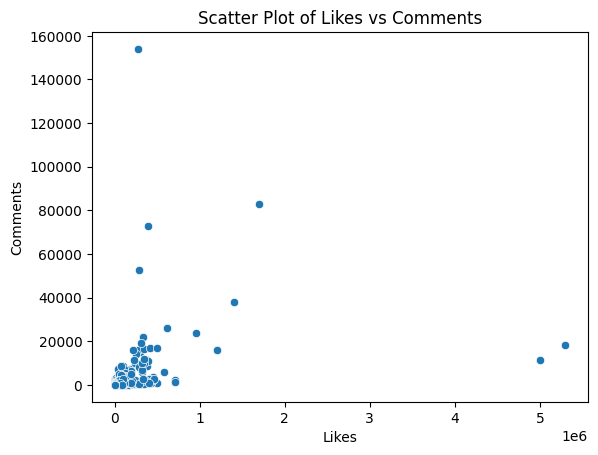

In [16]:
import seaborn as sns

# Scatter plot between 'Likes' and 'Comments'
sns.scatterplot(data=youtubers_df, x='Likes', y='Comments')
plt.title('Scatter Plot of Likes vs Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()


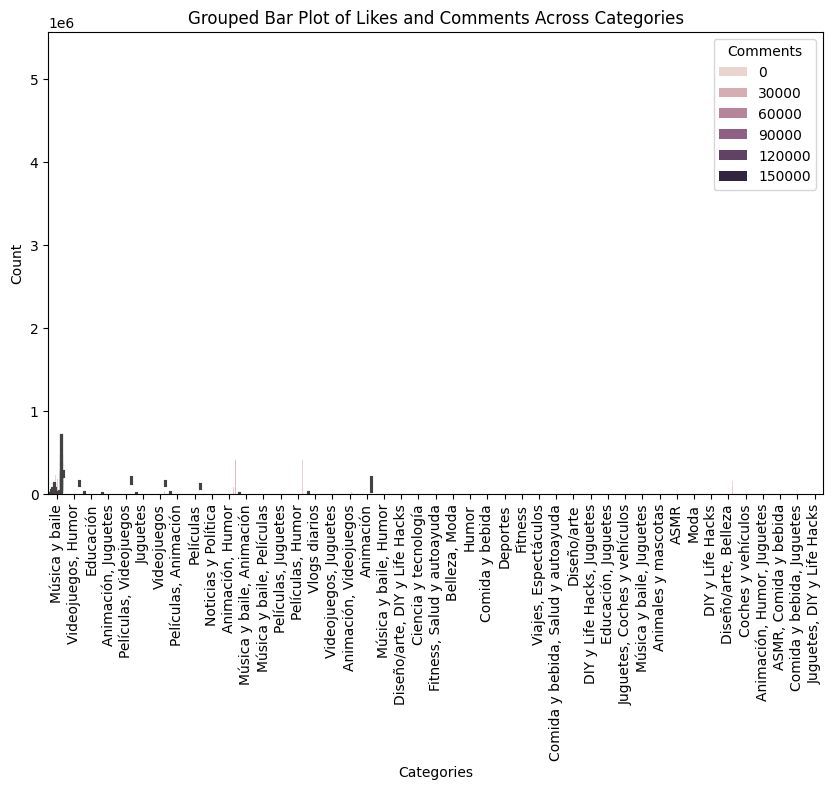

In [18]:
# Grouped bar plot of 'Likes' and 'Comments' across different categories
plt.figure(figsize=(10, 6))
sns.barplot(data=youtubers_df, x='Categories', y='Likes', hue='Comments')
plt.title('Grouped Bar Plot of Likes and Comments Across Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Comments')
plt.show()


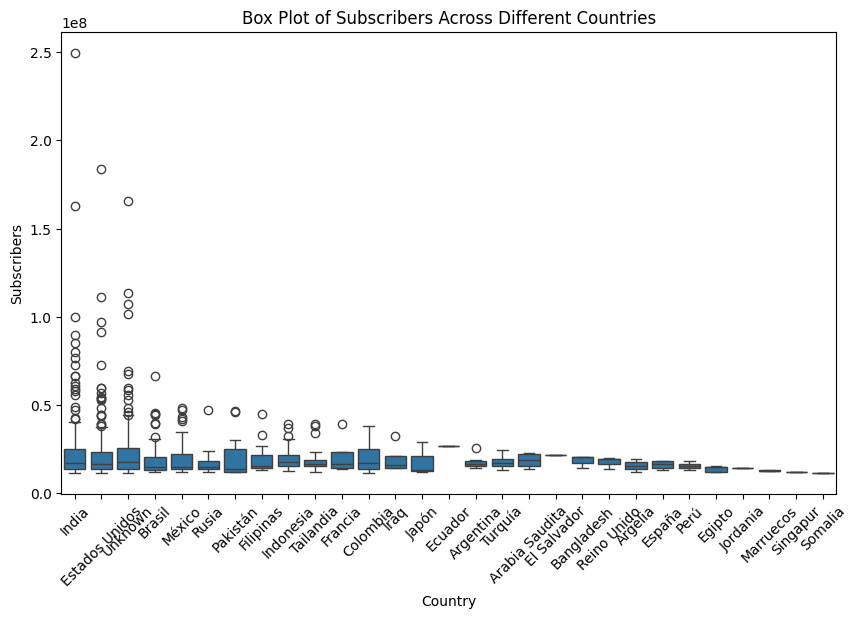

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of 'Suscribers' across different countries
plt.figure(figsize=(10, 6))
sns.boxplot(data=youtubers_df, x='Country', y='Suscribers')
plt.title('Box Plot of Subscribers Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Subscribers')
plt.xticks(rotation=45)
plt.show()


In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from scipy.stats import boxcox

# Sample DataFrame
data = {
    'feature1': [100, 200, 300, 400, 500],
    'feature2': [10, 20, 30, 40, 50],
    'feature3': [1, 2, 3, 4, 5],
}
df = pd.DataFrame(data)

# Creation of New Features
# Feature Interaction
df['interaction_feature'] = df['feature1'] * df['feature2']

# Binning or Bucketing
bins = [0, 200, 400, np.inf]
labels = ['low', 'medium', 'high']
df['binned_feature'] = pd.cut(df['feature1'], bins=bins, labels=labels)

# Transformation and Scaling
# Logarithmic Transformation
df['log_feature3'] = np.log(df['feature3'])

# Box-Cox Transformation
df['boxcox_feature2'], _ = boxcox(df['feature2'] + 1)  # Adding 1 to handle zero values

# Min-Max Scaling
scaler = MinMaxScaler()
df[['scaled_feature1', 'scaled_feature2', 'scaled_feature3']] = scaler.fit_transform(df[['feature1', 'feature2', 'feature3']])

# Standardization
scaler = StandardScaler()
df['standardized_feature1'] = scaler.fit_transform(df[['feature1']])

# Display the DataFrame with new features and transformed/scaled features
print(df)


   feature1  feature2  feature3  interaction_feature binned_feature  \
0       100        10         1                 1000            low   
1       200        20         2                 4000            low   
2       300        30         3                 9000         medium   
3       400        40         4                16000         medium   
4       500        50         5                25000           high   

   log_feature3  boxcox_feature2  scaled_feature1  scaled_feature2  \
0      0.000000         6.149535             0.00             0.00   
1      0.693147        10.435123             0.25             0.25   
2      1.098612        14.109616             0.50             0.50   
3      1.386294        17.429580             0.75             0.75   
4      1.609438        20.506515             1.00             1.00   

   scaled_feature3  standardized_feature1  
0             0.00              -1.414214  
1             0.25              -0.707107  
2             0.50  

In [27]:
print(df.columns)


Index(['feature1', 'feature2', 'feature3', 'interaction_feature',
       'binned_feature', 'log_feature3', 'boxcox_feature2', 'scaled_feature1',
       'scaled_feature2', 'scaled_feature3', 'standardized_feature1'],
      dtype='object')


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 384400.0


A mean squared error (MSE) of 384400.0 indicates the average squared difference between the predicted values and the actual values in your test set. Since MSE is a measure of the model's accuracy, a lower MSE indicates better performance, while a higher MSE indicates poorer performance.